In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm

In [31]:
def r_indices(shape):
    indices = []
    offset = shape[1]//2
    for i in range(shape[0]//2):
        idx = np.array( [ x for x in range(i+1) ] ) +(offset-i)
        indices.append(idx)
    print(indices)
        
def cubo(img, ancho=0): 
    x, y = img.shape[0]//2, img.shape[1]//2
    return np.delete(img.flatten(), img[x, y])

def c_indices(shape=3, val=1):
    valores = np.array( [(x*2)+1 for x in range( shape ) if (x*2)+1<shape ] )
#     print(valores)
    if shape%2 == 0:
        valores = (valores[1:])-1
    if val not in valores:
        idx = np.abs(valores-val).argmin()
        val = valores[ idx ]
    offset = (shape-val)//2
#     print(val, offset)
    indices = np.array( range( val ) )+offset
    return indices
    
    
# def cruz(shape=(3, 3), ancho=1):
def cruz(valores, ancho=1):
        ind_i = c_indices(valores.shape[0], ancho)
        ind_j = c_indices(valores.shape[1], ancho)
        
        elem_finales = []
        elem_finales.extend( valores[ind_i,:].flatten())
        elem_finales.extend(valores[:,ind_j].flatten())
        x, y = valores.shape[0]//2, valores.shape[1]//2
        elem_finales = np.delete(elem_finales, valores[x, y])
        return np.array(elem_finales)

def rombo(img):
    elem = np.zeros(img.shape)
    j = shape[0]//2
    print(j)
    for i in range(shape[0]//2):
        elem[i, j-i:j+i] = 1
        elem[-i, j-i:j+i] = 1
    return elem

def barra(img, ancho=1, orientation="h"):
    elem = np.zeros(img.shape)
    if orientation=="h":
        i = shape[0]//2
        
        elem[i:(i+ancho), :] = 1
        return elem
    i = img.shape[1]//2
    elem[:, i:i+ancho] = 1
    return elem
        

In [3]:
# rombo((3,3)) ROMBO NO ANDA!

In [25]:
import itertools

def binarizar_grayscale(img, umbral=128):
    img[img < umbral] = 0
    img[img > umbral] = 1
    return img

def dilatar(v):
#     print(v)
    f = v.flatten()
#     f[int(len(f)/2)] = 0
    return max(f)
    
def erosionar(v):
    f = v.flatten()
#     f[int(len(f)/2)] = 255
    return min(f)

def median(v):
    f = v.flatten()
    f.sort()
    out = f[int(len(f)/2)]
    return out

def apertura(img, elem=cubo, t_ventana=(3,3), ancho=1):
    v = im.copy()
    v = filtro(v, erosionar, elem, t_ventana, ancho)
    v = filtro(v, dilatar, elem, t_ventana, ancho)
    return v

def cierre(img, elem=cubo, t_ventana=(3,3), ancho=1):
    v = im.copy()
    v = filtro(v, dilatar, elem, t_ventana, ancho)
    v = filtro(v, erosionar, elem, t_ventana, ancho)
    return v

In [5]:
def filtro(img, operar=erosionar, elem=cruz, t_ventana=(3, 3), ancho=1):
    # El tamaño de ventana y el ancho deben ser acordes
    # Los "elem" asumen que el punto de apoyo es siempre el centro del objeto para ventanas con cantidad de elementos impares
    # y el entero inmediato superior al centro en caso de cantidad de elementos pares (coord t_ventana[0]//2, t_ventana[1]//2)
    new_shape = ( img.shape[0] - (t_ventana[0] - ancho) ), ( img.shape[1] - (t_ventana[1] - ancho) )
    print(new_shape)
    new_img = np.zeros(new_shape)
    for i, j in itertools.product( range( new_shape[0] ), range( new_shape[1] ) ):
        x, y = i, j
        ventana = img[ x: ( x+t_ventana[0] ), y: ( y+t_ventana[1] ) ]
#         print(ventana)
        vecinos = elem(ventana, ancho)
        new_img[i, j] = operar(vecinos)
    return new_img

In [44]:
img = cv2.imread("img_src/twitter.png", 0)
img = binarizar_grayscale(img)

(22, 22)


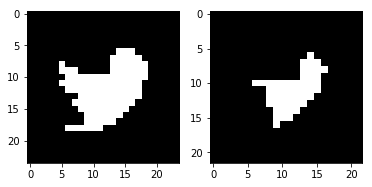

In [45]:
new_img = filtro(img, elem=cubo, ancho=1, operar=erosionar)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap=plt.cm.gray)
ax[1].imshow(new_img, cmap=plt.cm.gray)
plt.show()